In [1]:
import glob
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset/2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


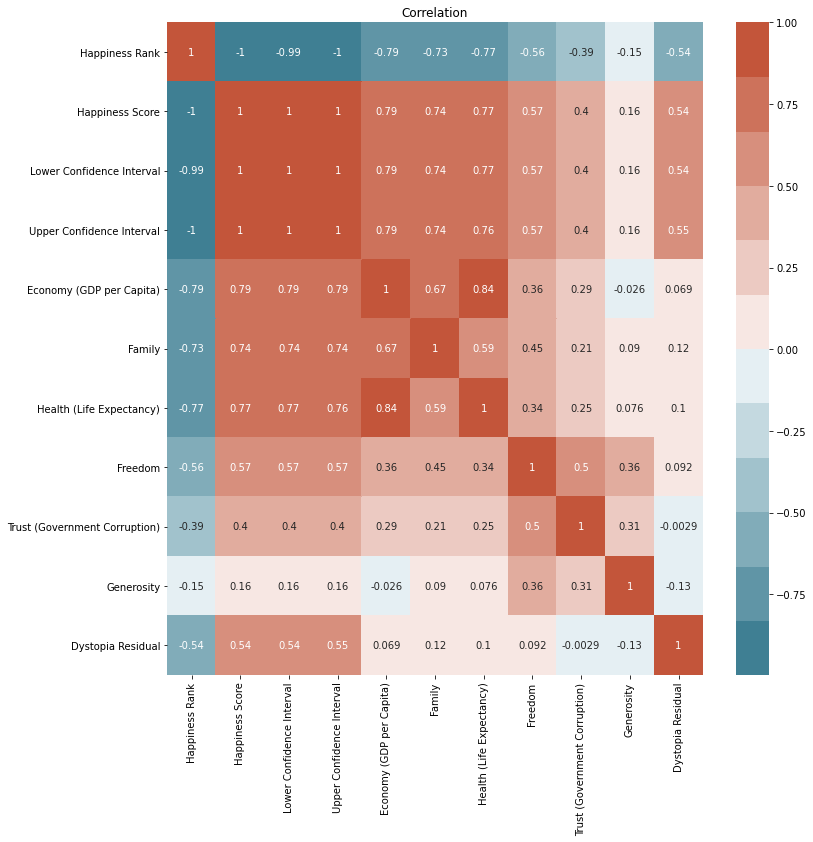

In [5]:
plt.figure(figsize=(12, 12))
df_corr = df.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation")
plt.show()

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
X = np.array(df[['Economy (GDP per Capita)' , 'Family' , 'Health (Life Expectancy)' , 'Freedom' , 'Trust (Government Corruption)' , 'Generosity' , 'Dystopia Residual']])
y = np.array(df[['Happiness Score']])

In [8]:
m = y.size

In [9]:
print('The shape of the X is {}'.format(X.shape))
print('The shape of the y is {}'.format(y.shape))

The shape of the X is (157, 7)
The shape of the y is (157, 1)


In [10]:
x_values = df.columns[6:-1]

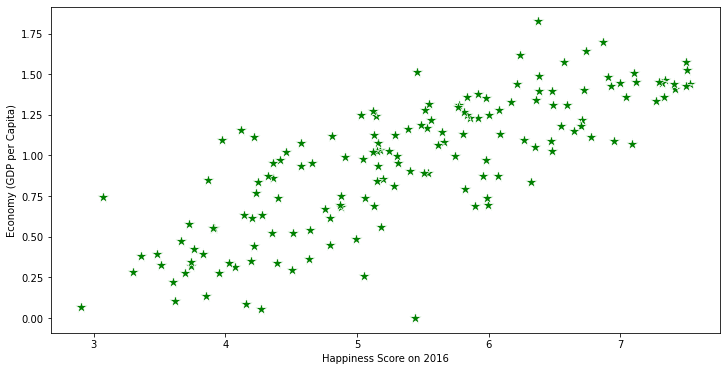

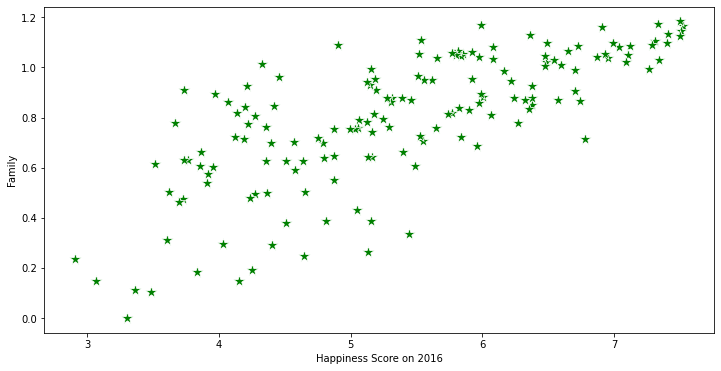

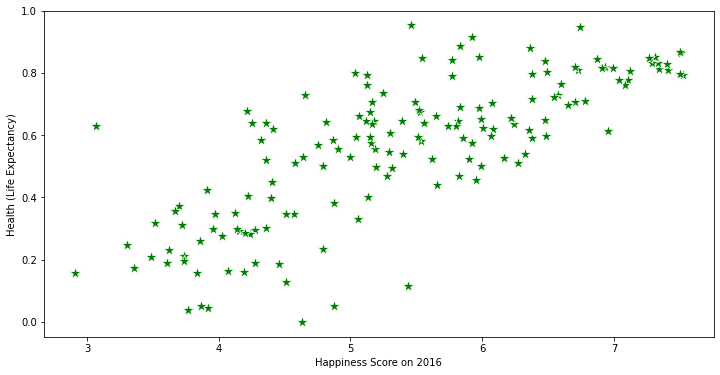

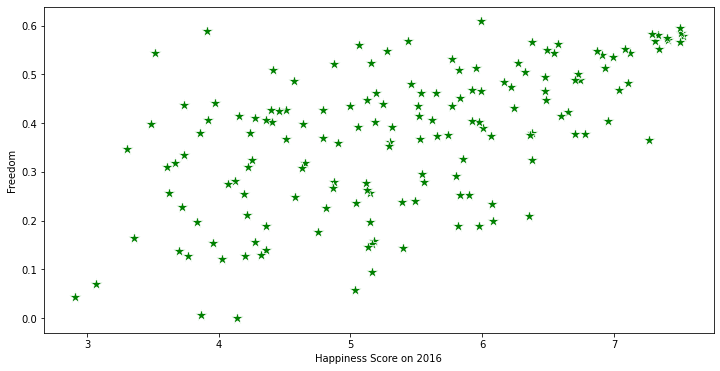

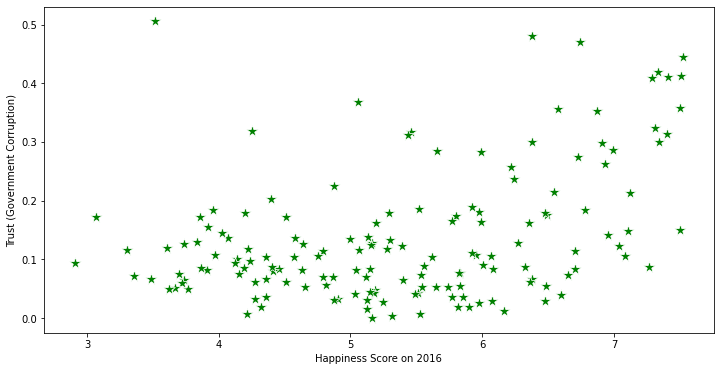

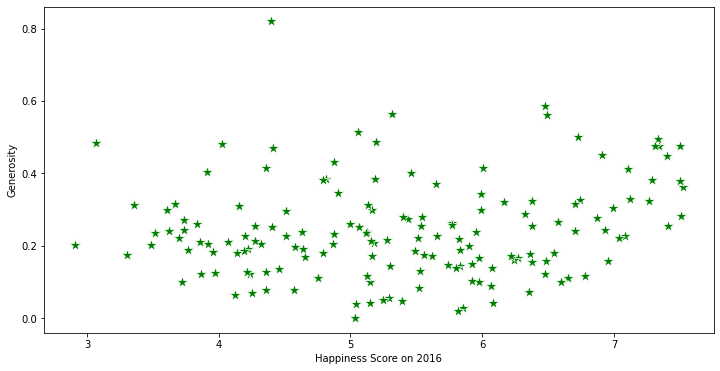

In [11]:
for each in x_values:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x = df['Happiness Score'] , y = df[each] , marker = '*' , s = 150 , color = 'green' )
    plt.xlabel('Happiness Score on 2016')
    plt.ylabel(each)
    plt.show()

In [12]:
def normalization(X):
    
    standard_diviation = np.std(X , axis = 0)
    
    mean = np.mean(X, axis = 0)
    
    X_normalized = (X - mean) / standard_diviation
    
    return X_normalized

In [13]:
X = normalization(X)

In [14]:
X = np.concatenate([np.ones(m).reshape(m , 1) , X] , axis = 1)
y = y.reshape(m , )

In [15]:
print('The shape of the X is {}'.format(X.shape))
print('The shape of the y is {}'.format(y.shape))

The shape of the X is (157, 8)
The shape of the y is (157,)


In [16]:
def cost_function(X , y , theta):
    
    m = y.size
    
    h = np.dot(X , theta)
    
    J = 1 / (2 * m) * np.sum(np.square( h - y )) 
    
    return J

In [17]:
theta = np.zeros(8)
J = cost_function(X , y , theta)

In [18]:
print('The value of the cost function with these {} theta is {:.2f} .'.format(theta , J))

The value of the cost function with these [0. 0. 0. 0. 0. 0. 0. 0.] theta is 15.13 .


In [25]:
def gradian_decent(X , y , theta , alpha ,  iteration):
    
    m = X.size
    
    list_of_cost_function_values = []
    list_of_thetas = []
    
    
    for i in range(iteration):
        
        theta = theta - ( alpha * ( 1 / m  )) * ( np.dot( X , theta ) - y ).dot( X )
        
        list_of_thetas.append(theta)
        list_of_cost_function_values.append(cost_function(X , y , theta))
    
    minimized_J_value = list_of_cost_function_values[-1]
    best_thetas = list_of_thetas[-1]
    
    best_h = np.dot( X , theta )
    
    return minimized_J_value , best_thetas , list_of_cost_function_values , best_h
     
    

In [26]:
theta = np.zeros(8)
alpha = 1
iteration = 100

In [27]:
minimized_J_value , best_thetas , list_of_cost_function_values , best_h = gradian_decent(X , y , theta , alpha ,  iteration)

In [28]:
print("Theta found by gradient descent: {}".format(best_thetas))
print("Final cost value:  {:0.10f}".format(minimized_J_value))

Theta found by gradient descent: [5.38217617 0.38989358 0.27041218 0.24601906 0.14540701 0.11289288
 0.12945943 0.53883441]
Final cost value:  0.0000559731


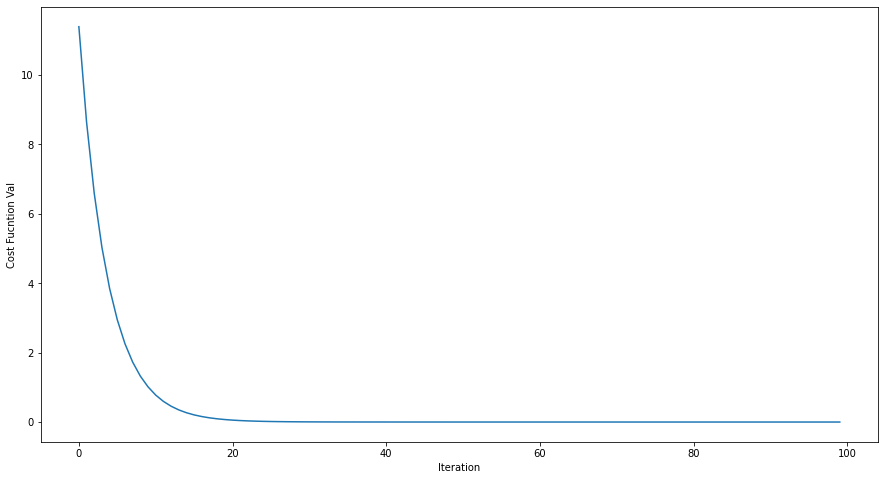

In [29]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = range(iteration) , y = list_of_cost_function_values)
plt.xlabel('Iteration')
plt.ylabel('Cost Fucntion Val')
plt.show()

In [30]:
def r_squared(predicted_hypothesis, actual_y):
    
    sum_of_squared_residuals= np.sum(np.square(actual_y - predicted_hypothesis))
    
    sum_of_squared_total= np.sum(np.square(actual_y - np.mean(actual_y)))
    
    r_squared_final = 1 - ((float(sum_of_squared_residuals)) / sum_of_squared_total )
    
    return r_squared_final

In [31]:
r_squared_final = r_squared(best_h, y)

In [33]:
def adjusted_r_squared(r_squared, actual_y):
    
    number_of_samples, number_of_features= X.shape
    
    number_of_features -= 1

    adjusted_r_squared= 1 - (1 - r_squared) * (number_of_samples - 1)/(number_of_samples - number_of_features - 1)
    
    return adjusted_r_squared

In [37]:
print('The R squared is {:.7f}'.format(adjusted_r_squared(r_squared_final, y) * 100))

The R squared is 99.9909502


In [38]:
print('Adjusted the R squared is {:.7f}'.format(r_squared_final * 100))

Adjusted the R squared is 99.9913563
